# Projeto 2 Ciência dos Dados - Engenharia Insper 2021.1
## Integrantes: Rafael Pascarelli Nicheri e Vinícius Matheus Morales
____________________________________________________________________________________________________________________________
## Objetivo:
### - Com esse projeto pretendemos prever o valor do aluguel de um determinado imóvel com base nos seguintes dados:
- Tamanho do terreno em m²;
- Quantidade de quartos;
- Quantidade de banheiros;
- Quantidade de suítes;
- Quantidade de vagas de carro;
- Se possui elevador;
- Se possui mobília;
- Se possui piscina;
- Se é uma construção nova;
- Região da cidade de São Paulo onde o imóvel se encontra.

#### Esse projeto poderá ajudar, por exemplo, uma corretora de imóveis a calcular o valor de aluguel de imóveis sem que precise de nada além dos dados do imóvel, que pode também ser obtido por meio de Web Scraping, automatizando ainda mais o processo futuramente

## 1. Importando as bibliotecas que serão utilizadas no projeto e lendo o Dataset que será utilizado para as previsões

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [2]:
data = pd.read_csv('sao-paulo-properties-april-2019.csv')  #ler uma base de dados no formato csv

### 1.1 Filtrando o Dataset em um DataFrame que contenha apenas os aluguéis e exclua as vendas

In [3]:
rent_filter = data['Negotiation Type'] == 'rent' # Filtro para usarmos apenas dados de aluguel
rent_data = data.loc[rent_filter, :] # Aplicando o filtro para mostrar apenas dados de alugel
rent_data # Mostrando a base de dados apemnas com dados do aluguel

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11205,3700,595,73,1,2,1,1,0,0,1,0,Brooklin/São Paulo,rent,apartment,-23.617682,-46.694963
11206,21000,3000,208,4,4,3,3,1,1,1,0,Brooklin/São Paulo,rent,apartment,-23.606891,-46.695934
11207,3800,710,55,1,1,0,1,0,1,1,0,Brooklin/São Paulo,rent,apartment,0.000000,0.000000
11208,5000,2354,205,3,2,1,2,1,0,0,0,Brooklin/São Paulo,rent,apartment,-23.612287,-46.681482


### 1.2 Classificação das variáveis:
- Condo = Quantitativa
- Size = Quantitativa
- Rooms = Quantitativa
- Toilets = Quantitativa
- Suites = Quantitativa
- Parking = Quantitativa
- Latitude = Quantitativa
- Longitude = Quantitativa


- Negotiation Type = DESCARTADO (Todos são "rent", portanto não requer análise e não impacta no resultado)
- Property Type = DESCARTADO (Todos são "apartment", portanto não requer análise e não impacta no resultado)


- District = Qualitativa
- Elevator = Qualitativa
- Furnished = Qualitativa
- Swimming Pool = Qualitativa
- New = Qualitativa


- Price = TARGET

### 1.3 Cruzando dados das variáveis dependentes com a variável independente
- Com o objetivo de observar o comportamento da variável target do projeto "Preço" com cada feature.
- A variável target é uma variável do tipo quantitativa, portanto ao cruzar com outras variáveis quantitativas como "Condo", "Size", "Rooms", "Toilets", "Suites" e "Parking" iremos utilizar medidas de associação e gráfico de dispersão.
- Ao cruzar as informações com variáveis qualitativas como "Elevator", "Furnished", "Swimming Pool" e "New" iremos usar medidas-resumo da variável quantitativa segmentando por rótulo da variável qualitativa e histogramas da variável quantitativa segmentando por rótulo da variável qualitativa.

Covariância Price x Condo:  2061689.3150625206
Covariância Price x Size:  164930.612274315
Covariância Price x Rooms:  1141.892448681154
Covariância Price x Toilets:  2051.751557160249
Covariância Price x Suites:  1832.662041724031
Covariância Price x Parking:  2007.8863743376407
Covariância Price x Latitude:  -775.823963507359
Covariância Price x Longitude:  -1577.8058425817587


Correlação Price x Condo:  0.7003605358604147
Correlação Price x Size:  0.7317953445658479
Correlação Price x Rooms:  0.3909508223219116
Correlação Price x Toilets:  0.5834881828941935
Correlação Price x Suites:  0.5883285003190463
Correlação Price x Parking:  0.6407433847370166
Correlação Price x Latitude:  -0.03693521358702288
Correlação Price x Longitude:  -0.038362097396233565


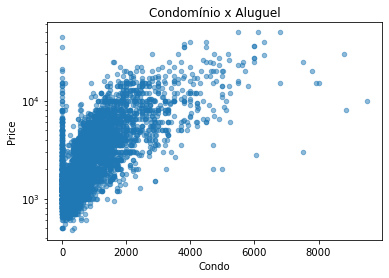

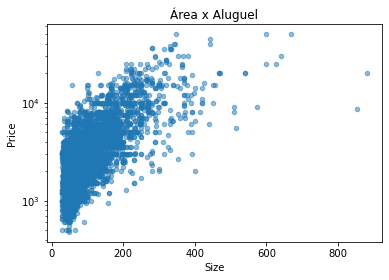

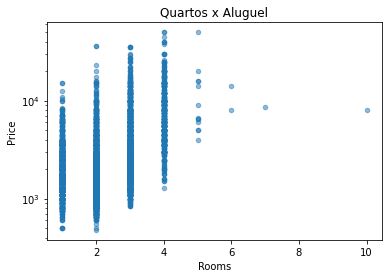

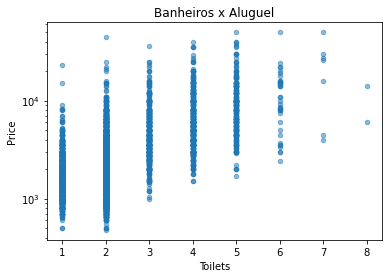

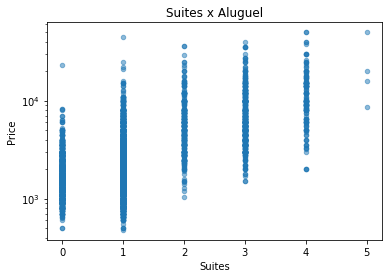

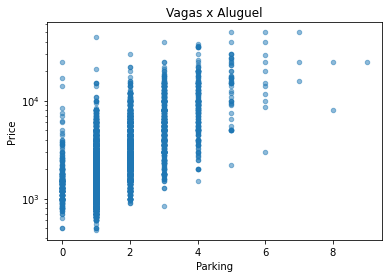

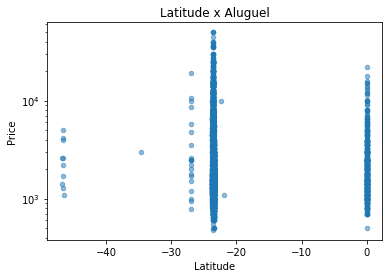

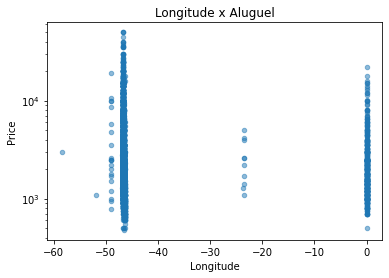

In [4]:
# ===== MEDIDAS DE ASSOCIAÇÃO =====

# ----- Análise descritiva entre preço de condomínio e o target
variaveis = ['Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking', 'Latitude', 'Longitude']

for var in variaveis:
    # Covariância entre o target e cada variável quantitativa
    print('Covariância Price x {}: '.format(var), rent_data.Price.cov(rent_data[var]))

print('\n')
for var in variaveis:
    # Correlação entre o target e cada variável quantitativa
    print('Correlação Price x {}: '.format(var), rent_data.Price.corr(rent_data[var]))


# ===== GRÁFICOS DE DISPERSÃO =====

# ----- Análise descritiva entre preço de condomínio e o target
condo_price = rent_data.loc[:, ['Price', 'Condo']] # Fazer um DataFrame apenas com os dados Price e Condo
condo_price.plot.scatter(x='Condo',
                         y='Price',
                         title='Condomínio x Aluguel',
                         alpha=0.5,
                         logy=True) # Cria um scatter plot com y em escala logarítimica

# ----- Análise descritiva entre área e o target
size_price = rent_data.loc[:, ['Price', 'Size']] # Fazer um DataFrame apenas com os dados Price e Size
size_price.plot.scatter(x='Size',
                        y='Price',
                        title='Área x Aluguel',
                        alpha=0.5,
                        logy=True) # Cria um scatter plot com y em escala logarítimica

# ----- Análise descritiva entre quantidade de quartos e o target
rooms_price = rent_data.loc[:, ['Price', 'Rooms']] # Fazer um DataFrame apenas com os dados Price e Rooms
rooms_price.plot.scatter(x='Rooms',
                         y='Price',
                         title='Quartos x Aluguel',
                         alpha=0.5,
                         logy=True) # Cria um scatter plot com y em escala logarítimica

# ----- Análise descritiva entre quantidade de banheiros e o target
toilets_price = rent_data.loc[:, ['Price', 'Toilets']] # Fazer um DataFrame apenas com os dados Price e Toilets
toilets_price.plot.scatter(x='Toilets',
                           y='Price',
                           title='Banheiros x Aluguel',
                           alpha=0.5,
                           logy=True) # Cria um scatter plot com y em escala logarítimica

# ----- Análise descritiva entre número de suites e o target
suites_price = rent_data.loc[:, ['Price', 'Suites']] # Fazer um DataFrame apenas com os dados Price e Suits
suites_price.plot.scatter(x='Suites',
                          y='Price',
                          title='Suites x Aluguel',
                          alpha=0.5,
                          logy=True) # Cria um scatter plot com y em escala logarítimica

# ----- Análise descritiva entre vagas de automóvel e o target
parking_price = rent_data.loc[:, ['Price', 'Parking']] # Fazer um DataFrame apenas com os dados Price e Parking
parking_price.plot.scatter(x='Parking',
                           y='Price',
                           title='Vagas x Aluguel',
                           alpha=0.5,
                           logy=True) # Cria um scatter plot com y em escala logarítimica

# ----- Análise descritiva entre Latitude e o target
parking_price = rent_data.loc[:, ['Price', 'Latitude']] # Fazer um DataFrame apenas com os dados Price e Latitude
parking_price.plot.scatter(x='Latitude',
                           y='Price',
                           title='Latitude x Aluguel',
                           alpha=0.5,
                           logy=True) # Cria um scatter plot com y em escala logarítimica

# ----- Análise descritiva entre Longitude e o target
parking_price = rent_data.loc[:, ['Price', 'Longitude']] # Fazer um DataFrame apenas com os dados Price e Longitude
parking_price.plot.scatter(x='Longitude',
                           y='Price',
                           title='Longitude x Aluguel',
                           alpha=0.5,
                           logy=True) # Cria um scatter plot com y em escala logarítimica

===== MEDIDAS RESUMO DA VARIÁVEL TARGET =====
count     7228.000000
mean      3077.669065
std       3522.830284
min        480.000000
25%       1350.000000
50%       2000.000000
75%       3300.000000
max      50000.000000
Name: Price, dtype: float64


(array([1., 0., 1., 0., 1., 0., 0., 0., 0., 3.]),
 array([1250., 1385., 1520., 1655., 1790., 1925., 2060., 2195., 2330.,
        2465., 2600.]),
 <a list of 10 Patch objects>)

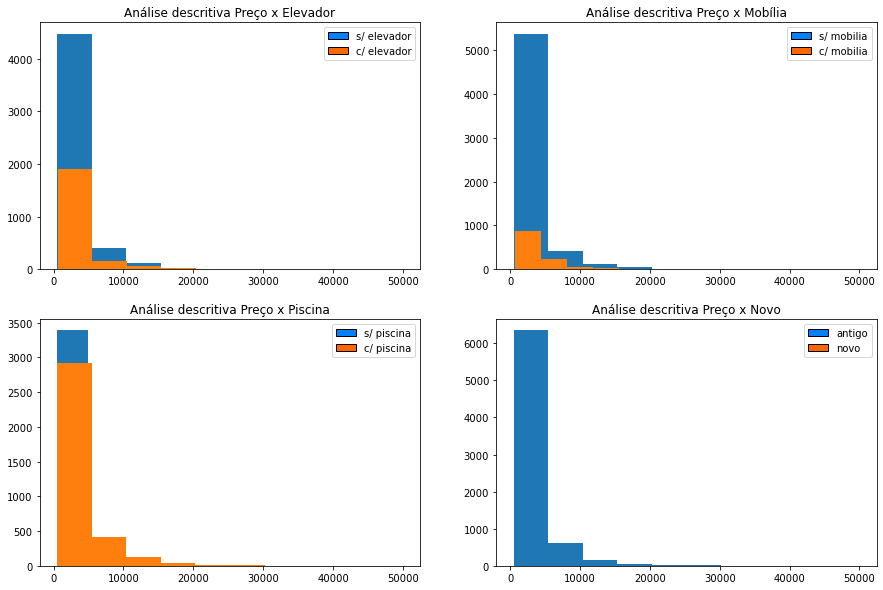

In [5]:
# ===== MEDIDAS RESUMO TARGET =====
print('===== MEDIDAS RESUMO DA VARIÁVEL TARGET =====')
print(rent_data.Price.describe())
print('=============================================')

# ===== HISTOGRAMAS =====

# Formatações iniciais
plt.figure(figsize=(15,10)) # Cria uma figura para plotar os graficos da maneira mais organizada
cmap = plt.get_cmap('jet')  # Paleta de cor

# ----- Análise descritiva entre ter ou não elevador e o target
elevator_filter  = rent_data.loc[rent_data['Elevator'] == 0, 'Price'] # Filtro para dados de apartamentos que não têm elevador
elevator_filter1 = rent_data.loc[rent_data['Elevator'] == 1, 'Price'] # Filtro para dados de apartamentos que têm elevador
plt.subplot(221) # Posição do gráfico numa matriz 2x2

# Legendas
plt.title('Análise descritiva Preço x Elevador')
elevator_1 = [Rectangle((0,0),1,1,color=c,ec="k") for c in [cmap(0.25) ,cmap(0.8)]] # Cria um retângulo para colocar as legendas e escolhe suas cores
elevator_2 = ["s/ elevador","c/ elevador"] # Define a descrição das legendas
plt.legend(elevator_1, elevator_2) # Cria as legendas
plt.hist(elevator_filter)  # Sem elevador
plt.hist(elevator_filter1) # Com elevador

# ----- Análise descritiva entre ter ou não mobília e o target
furnished_filter  = rent_data.loc[rent_data['Furnished'] == 0, 'Price'] # Filtro para dados de apartamentos que não têm mobília
furnished_filter1 = rent_data.loc[rent_data['Furnished'] == 1, 'Price'] # Filtro para dados de apartamentos que têm mobília
plt.subplot(222) # Posição do gráfico numa matriz 2x2

# Legendas
plt.title('Análise descritiva Preço x Mobília')
furnished_1 = [Rectangle((0,0),1,1,color=c,ec="k") for c in [cmap(0.25) ,cmap(0.8)]] # Cria um retângulo para colocar as legendas e escolhe suas cores
furnished_2 = ["s/ mobilia","c/ mobilia"] # Define a descrição das legendas
plt.legend(furnished_1, furnished_2) # Cria as legendas
plt.hist(furnished_filter)  # Sem mobília
plt.hist(furnished_filter1) # Com mobília

# ----- Análise descritiva entre ter ou não piscina e o target
swimmingpool_filter  = rent_data.loc[rent_data['Swimming Pool'] == 0, 'Price'] # Filtro para dados de apartamentos que não têm piscina
swimmingpool_filter1 = rent_data.loc[rent_data['Swimming Pool'] == 1, 'Price'] # Filtro para dados de apartamentos que têm piscina
plt.subplot(223) # Posição do gráfico numa matriz 2x2

# Legendas
plt.title('Análise descritiva Preço x Piscina')
piscina_1 = [Rectangle((0,0),1,1,color=c,ec="k") for c in [cmap(0.25) ,cmap(0.8)]] # Cria um retângulo para colocar as legendas e escolhe suas cores
piscina_2 = ["s/ piscina","c/ piscina"] # Define a descrição das legendas
plt.legend(piscina_1, piscina_2) # Cria as legendas
plt.hist(swimmingpool_filter)  # Sem piscina
plt.hist(swimmingpool_filter1) # Com piscina

# ----- Análise descritiva entre ser ou não um imóvel novo e o target
new_filter  = rent_data.loc[rent_data['New'] == 0, 'Price'] # Filtro para dados de apartamentos que não são novos
new_filter1 = rent_data.loc[rent_data['New'] == 1, 'Price'] # Filtro para dados de apartamentos que são novos
plt.subplot(224) # Posição do gráfico numa matriz 2x2

# Legendas
plt.title('Análise descritiva Preço x Novo')
novo_1 = [Rectangle((0,0),1,1,color=c,ec="k") for c in [cmap(0.25) ,cmap(0.8)]] # Cria um retângulo para colocar as legendas e escolhe suas cores
novo_2 = ["antigo","novo"] # Define a descrição das legendas
plt.legend(novo_1, novo_2) # Cria as legendas
plt.hist(new_filter, density=False)  # Não novo
plt.hist(new_filter1, density=False) # Novo

## Conclusão dos gráficos:
- Deve ser feito um dimensionamento de recursos de todas as variáveis quantitativas e lidar com a falta de dados de latitude e longitude, usando o SimpleImputer com a estratégia de Média (strategy='mean');
- Variáveis relevantes:
    - Condomínio;
    - Área;
    - Quartos;
    - Banheiros;
    - Suites;
    - Vagas;
    - Latitude (cuidando da falta de dados);
    - Longitude (cuidando da falta de dados);
    - Elevador;
    - Mobília;
    - Piscina;
    - Imóvel novo.

### 1.4 Reordenando os dados para ficarem em uma ordem mais legível

In [6]:
# DataFrame com os dados relevantes
relevant_data = rent_data.loc[:, ['Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking', 'Latitude', 'Longitude', 'Elevator', 'Furnished', 'Swimming Pool', 'New', 'Price']]
relevant_data.sort_values(['Price'], ascending=True)

,Condo,Size,Rooms,Toilets,Suites,Parking,Latitude,Longitude,Elevator,Furnished,Swimming Pool,New,Price
508,295,48,2,2,1,1,-23.626154,-46.470810,0,0,0,0,480
4486,380,66,2,1,0,1,-23.456981,-46.730490,0,0,0,0,500
2878,36,45,1,2,1,0,0.000000,0.000000,0,0,1,0,500
288,0,40,1,2,1,1,-23.491297,-46.393691,0,0,0,0,500
122,0,50,1,2,1,1,-23.559095,-46.488160,0,0,0,0,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10530,4500,442,4,5,4,6,-23.623419,-46.674971,0,0,1,0,40000
234,0,443,4,2,1,1,-23.585700,-46.682600,0,0,0,0,45000
3732,6100,349,4,5,4,5,-23.572635,-46.658955,0,0,1,0,50000
1589,6800,598,4,7,4,6,-23.550690,-46.721691,1,0,1,0,50000


## 2. Preprocessamento de dados

In [7]:
# Transformando int em float para auxiliar no dimensionamento de recursos
for i in relevant_data.keys():
    relevant_data[i] = relevant_data[i].astype(float)

In [8]:
X = relevant_data.iloc[:, :-1].values # Separando as variáveis independentes
Y = relevant_data.iloc[:, -1].values  # Separando a variável dependente

### 2.1 Lidando com a falta de dados de latitude e longitude

In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') # Definindo a estratégia da classe SimpleImputer para "média"
imputer.fit(X[:, 6:8])
X[:, 6:8] = imputer.transform(X[:, 6:8]) # Preenchendo Latitudes e Longitudes vazias

### 2.2 Separando os dados em Treino e Teste

In [10]:
# Separando os dados em Treino e Teste
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

### 2.3 Dimensionamento de recursos

In [11]:
# Dimensionamento de recursos
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, :7] = sc.fit_transform(X_train[:, :7]) # Redimensionando as colunas com variáveis quantitativas
X_test[:, :7] = sc.transform(X_test[:, :7]) # Redimensionando também as colunas do teste

# Regressões

## 3. Regressão por Árvore de Decisão

<img src="decision_tree3.png" width="600" height="300">

#### Regressão por Árvore de Decisão
Dado um scatter plot como o do exemplo, a regressão por árvore de decisão irá "cortar" e separar os dados em grupos, cada um sendo uma ramificação da árvore, que tomará sua decisão sempre nas pontas das folhas

<img src="decision_tree.png" width="600" height="300">

Acima um exemplo da separação dos dados.

Abaixo o mesmo exemplo mas com as "folhas" da árvore expostas.

<img src="decision_tree2.png" width="600" height="300">

In [12]:
# Aplicar o Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, Y_train)

DecisionTreeRegressor()

In [13]:
Y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2) # Configurando o print para uma precisão de duas casas decimais
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1)) # Matriz de comparação dos resultados

[[1430. 1480.]
 [1600. 3800.]
 [4500. 5000.]
 ...
 [2500. 2200.]
 [6000. 3000.]
 [4500. 4500.]]


### 3.1 Precisão por R²

In [14]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.6375858430135499

## 4. Regressão linear múltipla

<img src="regressao_linear_multipla.png" width="600" height="450">

<img src="MMQ.png" width="400" height="200">

<img src="MMQ2.png" width="400" height="200">

#### O que é a regressão linear múltipla?
É uma técnica estatística que usa várias variáveis explicativas para prever o resultado de uma variável de resposta.
O objetivo da regressão linear múltipla é modelar a relação linear entre as variáveis explicativas (independentes) e a variável de resposta (dependente).

Em essência, a regressão múltipla é a extensão da regressão linear simples porque envolve mais de uma variável explicativa.

A regressão linear simples é uma função que permite a um analista ou estatístico fazer previsões sobre uma variável com base nas informações conhecidas sobre outra variável. A regressão linear só pode ser usada quando se tem duas variáveis contínuas - uma variável independente e uma variável dependente. A variável independente é o parâmetro usado para calcular a variável dependente ou resultado. Um modelo de regressão múltipla se estende a várias variáveis explicativas.

Existe uma relação linear entre as variáveis dependentes e as variáveis independentes.

As variáveis independentes não são altamente correlacionadas entre si e as observações são selecionadas de forma independente e aleatória da população. Os resíduos devem ser normalmente distribuídos com uma média de 0 e variância σ
O coeficiente de determinação (R-quadrado) é uma métrica estatística usada para medir o quanto da variação no resultado pode ser explicado pela variação nas variáveis independentes. R2 sempre aumenta à medida que mais preditores são adicionados ao modelo MLR, mesmo que os preditores possam não estar relacionados à variável de resultado.

O R2 por si só não pode ser usado para identificar quais preditores devem ser incluídos em um modelo e quais devem ser excluídos. R2 só pode estar entre 0 e 1, onde 0 indica que o resultado não pode ser previsto por nenhuma das variáveis independentes e 1 indica que o resultado pode ser previsto sem erros das variáveis independentes.

Ao interpretar os resultados da regressão múltipla, os coeficientes beta são válidos enquanto mantêm todas as outras variáveis constantes ("todo o resto igual"). A saída de uma regressão múltipla pode ser exibida horizontalmente como uma equação ou verticalmente em forma de tabela.

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [16]:
Y_pred = regressor.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1)) # Matriz de comparação dos resultados

[[1792.27 1480.  ]
 [3409.92 3800.  ]
 [5044.55 5000.  ]
 ...
 [2477.84 2200.  ]
 [6364.79 3000.  ]
 [5491.82 4500.  ]]


### 4.1 Precisão por R²

In [17]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.6069289369023552

## 5. Regressão por Vetores de Suporte

#### O que é a SVR
Regressão por Vetores de Suporte tem grande semelhança visual da Regressão Linear Simples, a qual utiliza o R2 para definir sua previsão. O que os assemelha nesse aspecto visual é que a SVR é como um tubo ao invés de uma reta e o que estiver dentro do tubo não será considerado como erro, ou seja, cria uma margem de erro denominada com a letra grega ε.

<img src="SVR.png" width="400" height="200">

<img src="SVR2.png" width="600" height="300">

In [18]:
from sklearn.svm import SVR
regressor = SVR(kernel='linear')
regressor.fit(X_train, Y_train)

SVR(kernel='linear')

In [19]:
Y_pred = regressor.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1)) # Matriz de comparação dos resultados

[[1400.01 1480.  ]
 [2146.34 3800.  ]
 [4121.52 5000.  ]
 ...
 [2228.2  2200.  ]
 [4714.74 3000.  ]
 [4142.96 4500.  ]]


### 5.1 Precisão por R²

In [20]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.48454809898207296

## 6. Regressão por Floresta Aleatória (selecionado como regressão principal)

#### Random Forest Regression 
É um algoritmo de aprendizagem supervisionada que usa o método de aprendizagem em conjunto para classificação e regressão, sendo cada árvore uma possibilidade de sequências de algoritmos de regressão que irão retornar um determinado resultado, que será a média dos resultados de todas as árvores

In [21]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=800, random_state=123) # Definindo um número de árvores para maior sucesso
regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=800, random_state=123)

In [22]:
Y_pred = regressor.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1)) # Matriz de comparação dos resultados

[[1400.63 1480.  ]
 [2093.28 3800.  ]
 [4590.01 5000.  ]
 ...
 [2368.51 2200.  ]
 [4760.06 3000.  ]
 [4390.99 4500.  ]]


### 6.1 Precisão por R²

In [23]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.7642279341440652

# Conclusão:

#### A performance do projeto poderia ser melhorada talvez com mais variáveis como, segurança do local, shopping próximo, estação de metrô ou trem próxima, policiamento do local, hospital próximo e afins.

#### De fato a Regressão escolhida inicialmente, Random Forest Regression, foi a que se mostrou mais capaz de responder nossa pergunta: Qual o preço do aluguel dadas as variáveis:
- Condo
- Size
- Rooms
- Toilets
- Suites
- Parking
- Elevator
- Furnished
- Swimming Pool
- New
- District
- Negotiation Type
- Property Type
- Latitude
- Longitude

#### O Random Forest Regression teve o melhor desempenho, como esperado, tendo uma porcentagem de acerto de 76,42%.

#### Podemos notar também que a Regressão Linear Múltipla obteve ótimos resultados na casa dos 60%.

#### Em terceiro lugar ficou a Regressão por Árvore de Decisão, o segundo método escolhido para a tentativa de previsão, com uma porcentagem de acerto em torno de 60% também.

#### Por último podemos notar o pior desempenho com o SVR na casa dos 50%.

# Referências
Slides de aula de autoria da Professora Maria Kelly Venezuela

Curso Udemy: "Machine Learning A-Z™: Hands-On Python & R In Data Science"